<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [1]:
# Set your student number
student_number = 400101691
Name = 'Kimia'
Last_Name = 'Fakheri'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [2]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

## Importing Libraries

In [1]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [2]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:10<00:00, 2542054.09it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 146287.80it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2758362.86it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18423444.53it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [3]:
## FILL HERE
num_classes = len(train_set.classes)
print("Number of classes: ", num_classes)

# Input dimension
input_dim = train_set.data.shape[1] * train_set.data.shape[2]
print("Input dimension: ", input_dim)

Number of classes:  10
Input dimension:  784


In [4]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

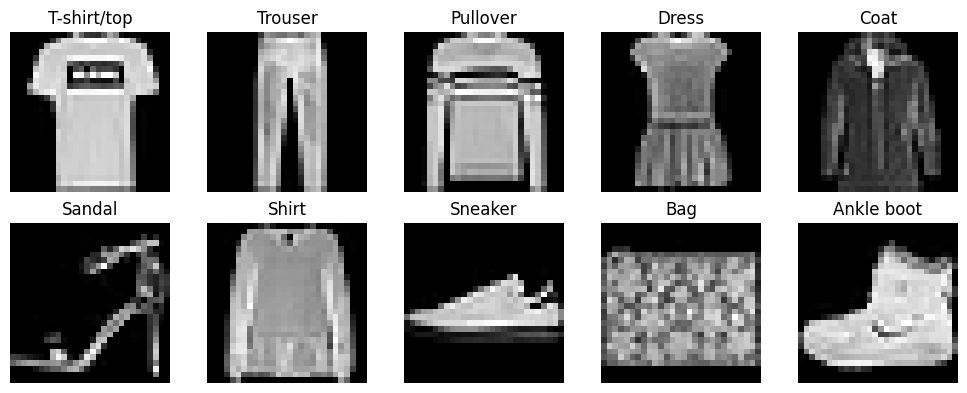

In [5]:
samples = {}
for data, target in train_set:
    if len(samples) == num_classes:
        break
    if target not in samples:
        samples[target] = data

# Plot samples
fig, axs = plt.subplots(2, num_classes//2, figsize=(10, 4))
axs = axs.ravel()

for i, ax in enumerate(axs):
    if i < num_classes:
        ax.imshow(samples[i].squeeze(), cmap='gray')  # squeeze is used to remove the channel dimension
        ax.set_title(train_set.classes[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [6]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [7]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [8]:
def affine_forward(x, w, b):
    out = x.view(x.size(0), -1).mm(w) + b  # Reshape input and perform matrix multiplication
    return out

def relu(x):
    out = x.clamp(min=0)  # ReLU sets all negative values in the matrix x to 0 and keeps all the other values constant
    return out

Function `model` returns output of the whole model for the input `x` using the parameters:

In [9]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    # number of batches
    B = x.shape[0]
    x = x.view(B, -1)

    for i in range(num_layers - 1):
        x = affine_forward(x, parameters[f'w{i}'], parameters[f'b{i}'])
        x = relu(x)

    # Output layer
    output = affine_forward(x, parameters[f'w{num_layers - 1}'], parameters[f'b{num_layers - 1}'])


    return output

Implementing cross entropy loss:

In [10]:
def cross_entropy_loss(scores, y):
    n = len(y)
    # Convert labels to one-hot vectors
    one_hot = torch.zeros(n, scores.size(1))
    one_hot[torch.arange(n), y] = 1

    # Compute softmax
    exp_scores = torch.exp(scores)
    probs = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)

    # Compute cross entropy loss
    correct_logprobs = -torch.log(probs[range(n), y])
    loss = torch.sum(correct_logprobs) / n

    return loss

Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [11]:
def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
    with torch.no_grad():  # We don't need to track this in the computation graph
        for name, param in parameters.items():
            param -= learning_rate * param.grad  # Update parameter
            param.grad.zero_()

Training functions:

In [12]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    '''This function calculates the accuracy of the model predictions.'''
    acc = (y_pred == y_true).mean()
    return acc

def train(train_loader, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch.'''
    train_loss = 0
    N_train = len(train_loader.dataset)

    Y = []
    Y_pred = []

    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        loss = cross_entropy_loss(p, y)
        loss.backward()
        sgd_optimizer(parameters, learning_rate)

        train_loss += loss.item()

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Epoch {epoch}, Batch {i}, Train Loss: {train_loss / N_train}, Accuracy of train set: {acc}')
    return train_loss / N_train, acc

def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader.'''
    total_loss = 0
    N = len(loader.dataset)

    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        loss = cross_entropy_loss(p, y)
        total_loss += loss.item()

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f'Epoch {epoch}, {set_name} Loss: {total_loss}, Accuracy of {set_name} set: {acc}')

    return total_loss, acc

In [13]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [14]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(train_loader, learning_rate, epoch)
        test_loss, test_acc = validate(test_loader, epoch, 'Test')

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)


    ## plot the loss history of training and test sets
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses, label='Train')
    plt.plot(range(num_epochs), test_losses, label='Test')
    plt.title('Loss history')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    ## plot the accuracy history of training and test sets
    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), train_accuracies, label='Train')
    plt.plot(range(num_epochs), test_accuracies, label='Test')
    plt.title('Accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    return train_losses, test_losses, train_accuracies, test_accuracies

Epoch 0, Batch 937, Train Loss: 0.03585975983937582, Accuracy of train set: 0.26636666666666664
Epoch 0, Test Loss: 0.03579016401767731, Accuracy of Test set: 0.4633
Epoch 1, Batch 937, Train Loss: 0.03423816995422045, Accuracy of train set: 0.3709166666666667
Epoch 1, Test Loss: 0.029916093158721922, Accuracy of Test set: 0.2447
Epoch 2, Batch 937, Train Loss: 0.02246626382569472, Accuracy of train set: 0.4415833333333333
Epoch 2, Test Loss: 0.017307904505729676, Accuracy of Test set: 0.557
Epoch 3, Batch 937, Train Loss: 0.014935811465978622, Accuracy of train set: 0.6340333333333333
Epoch 3, Test Loss: 0.014410505521297455, Accuracy of Test set: 0.6657
Epoch 4, Batch 937, Train Loss: 0.012837679887811343, Accuracy of train set: 0.6963166666666667
Epoch 4, Test Loss: 0.012522095930576325, Accuracy of Test set: 0.7256
Epoch 5, Batch 937, Train Loss: 0.0114680373330911, Accuracy of train set: 0.7382333333333333
Epoch 5, Test Loss: 0.011145602163672446, Accuracy of Test set: 0.7536
Epoc

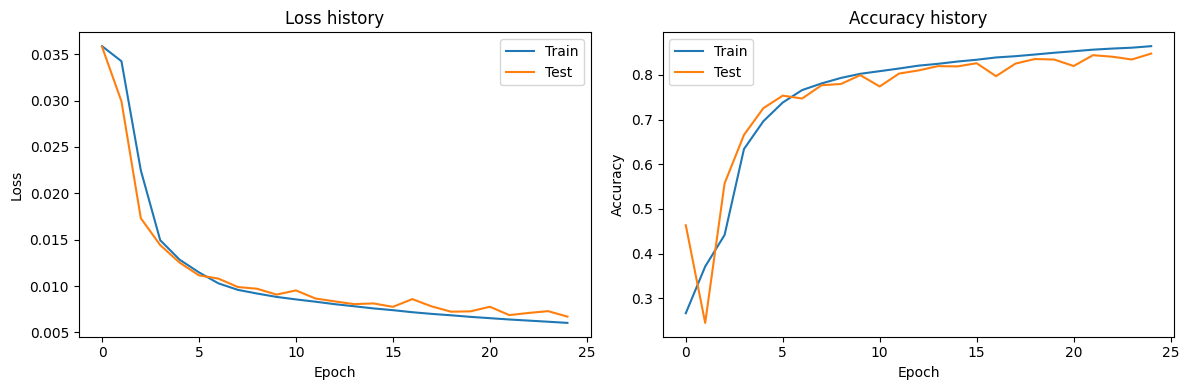

In [15]:
train_losses, test_losses, train_accuracies, test_accuracies = train_model([train_loader, test_loader], num_epochs=25, learning_rate=0.005)

In [16]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8478


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

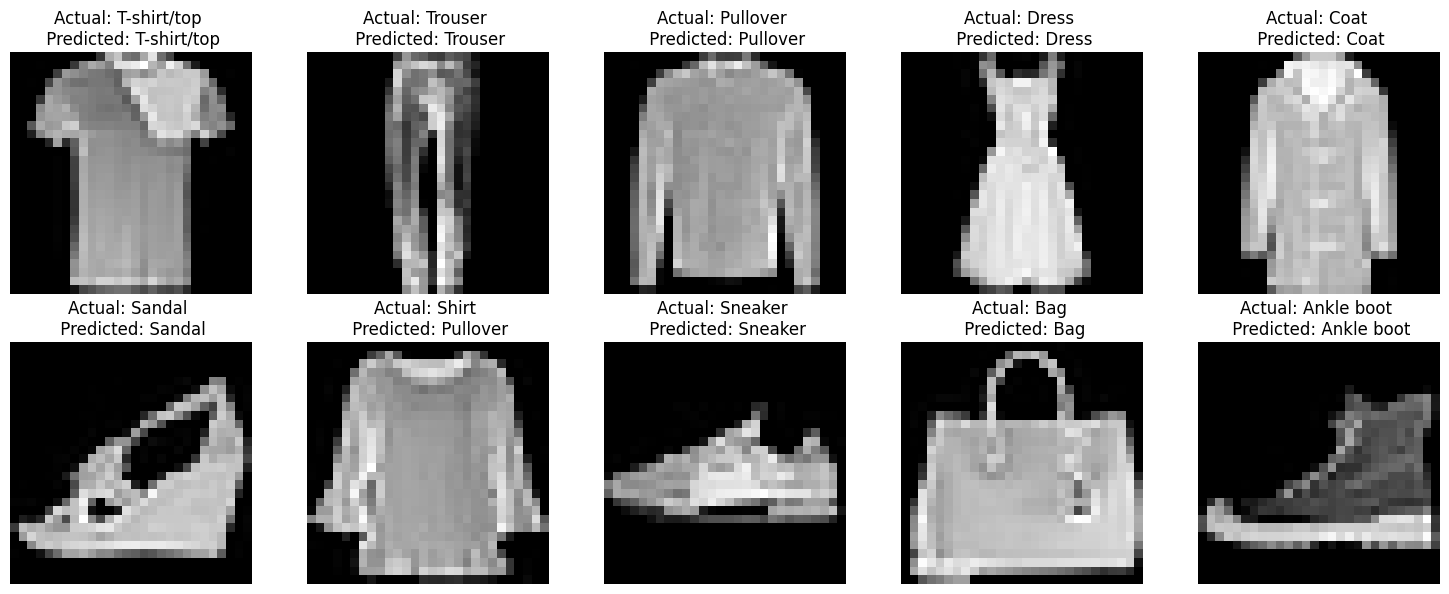

In [19]:
all_preds = []
all_labels = []
all_images = []
for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    preds = model(images, parameters)
    all_preds.extend(preds.argmax(dim=1).cpu().numpy())
    all_labels.extend(labels.cpu().numpy())
    all_images.extend(images.cpu().numpy())

# Get one sample for each class
samples = {}
for i, (image, pred, label) in enumerate(zip(all_images, all_preds, all_labels)):
    if len(samples) == num_classes:  # We've got a sample for each class
        break
    if label not in samples:
        samples[label] = (image, pred)

# Plot samples
fig, axs = plt.subplots(2, num_classes//2, figsize=(15, 6))
axs = axs.ravel()  # Flatten the array of axes

for i, ax in enumerate(axs):
    if i < num_classes:
        image, pred = samples[i]
        ax.imshow(image.squeeze(), cmap='gray')  # squeeze is used to remove the channel dimension
        ax.set_title(f'Actual: {test_set.classes[i]} \n Predicted: {test_set.classes[pred]}')
    ax.axis('off')

plt.tight_layout()
plt.show()
